In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)


In [4]:


X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y = np.array([[0], [1], [1], [0]])


In [5]:


input_neurons = 2
hidden_neurons = 4
output_neurons = 1

np.random.seed(42)

W1 = np.random.randn(input_neurons, hidden_neurons) * 0.1
b1 = np.zeros((1, hidden_neurons))

W2 = np.random.randn(hidden_neurons, output_neurons) * 0.1
b2 = np.zeros((1, output_neurons))

learning_rate = 0.1
epochs = 5000

loss_history = []


In [6]:


for epoch in range(epochs):

    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)

    z2 = np.dot(a1, W2) + b2
    y_hat = sigmoid(z2)

    loss = np.mean((y - y_hat) ** 2)
    loss_history.append(loss)


    error_output = y - y_hat
    d_output = error_output * sigmoid_derivative(y_hat)

    error_hidden = d_output.dot(W2.T)
    d_hidden = error_hidden * sigmoid_derivative(a1)


    W2 += a1.T.dot(d_output) * learning_rate
    b2 += np.sum(d_output, axis=0, keepdims=True) * learning_rate

    W1 += X.T.dot(d_hidden) * learning_rate
    b1 += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

    if epoch % 500 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")


Epoch 0, Loss: 0.25013239213983735
Epoch 500, Loss: 0.25000079659149527
Epoch 1000, Loss: 0.2500007576740669
Epoch 1500, Loss: 0.2500007209438966
Epoch 2000, Loss: 0.25000068623637617
Epoch 2500, Loss: 0.25000065340176886
Epoch 3000, Loss: 0.25000062230362363
Epoch 3500, Loss: 0.25000059281738396
Epoch 4000, Loss: 0.2500005648291614
Epoch 4500, Loss: 0.25000053823465496


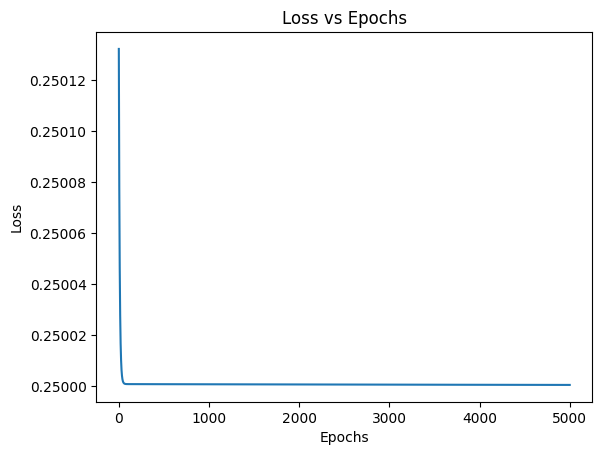

In [7]:


plt.plot(loss_history)
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


In [8]:


print("Final Predictions:")
print(y_hat)


Final Predictions:
[[0.50045558]
 [0.50006147]
 [0.49996086]
 [0.4995684 ]]
